***
Task : To build classifiers using different classifications algorithms and find Best Method for Prediction for Manipulator. <br>
Dataset : Benish Model<br><br>
    <b>Features</b> : DSRI,	GMI,	AQI,	SGI,	DEPI,	SGAI,	ACCR,	LEVI
<br>
    <b>Target</b> : Manipulator
    <br>
***

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.express as px

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,fbeta_score

In [2]:
import imblearn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn. neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble,svm
from sklearn.ensemble import RandomForestClassifier

## PART I : Data Preparation

In [4]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("../input/benish/benishmodel.csv")
cdata = pd.read_csv("../input/benish/completedata.csv")

In [6]:
data

,Company ID,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,Manipulator,C-MANIPULATOR
0,1,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,Yes,1
1,2,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,Yes,1
2,3,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,Yes,1
3,4,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,Yes,1
4,5,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
215,216,1.002026,0.998118,-0.917605,1.088962,1.030527,1.076770,-0.001079,1.080009,No,0
216,217,0.909365,1.170298,1.971874,1.279013,0.971605,0.985939,-0.035854,1.025102,No,0
217,218,0.937403,0.973292,1.131131,1.083577,1.050011,0.959512,-0.095279,0.976332,No,0
218,219,1.044944,1.021424,4.437887,0.870790,1.026489,1.060493,-0.157146,0.916070,No,0


###  The above data is Sample for Model Development data

In [7]:
cdata

,Company ID,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,Manipulater,C-MANIPULATOR
0,1,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,Yes,1
1,2,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,Yes,1
2,3,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,Yes,1
3,4,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,Yes,1
4,5,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
1234,1235,0.893794,1.009273,1.121404,0.775386,1.035547,1.467146,-0.139215,0.947127,No,0
1235,1236,1.610841,1.000000,0.672489,3.320315,0.743969,0.968648,-0.028570,2.052802,No,0
1236,1237,0.711823,0.938368,1.045118,1.057345,1.274005,0.634451,-0.174759,0.782268,No,0
1237,1238,0.870641,1.035855,1.447722,1.202783,1.101233,1.010935,-0.061474,0.906750,No,0


### the above data is Complete data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company ID     220 non-null    int64  
 1   DSRI           220 non-null    float64
 2   GMI            220 non-null    float64
 3   AQI            220 non-null    float64
 4   SGI            220 non-null    float64
 5   DEPI           220 non-null    float64
 6   SGAI           220 non-null    float64
 7   ACCR           220 non-null    float64
 8   LEVI           220 non-null    float64
 9   Manipulator    220 non-null    object 
 10  C-MANIPULATOR  220 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 19.0+ KB


## PART II : Exploratory Data Analysis

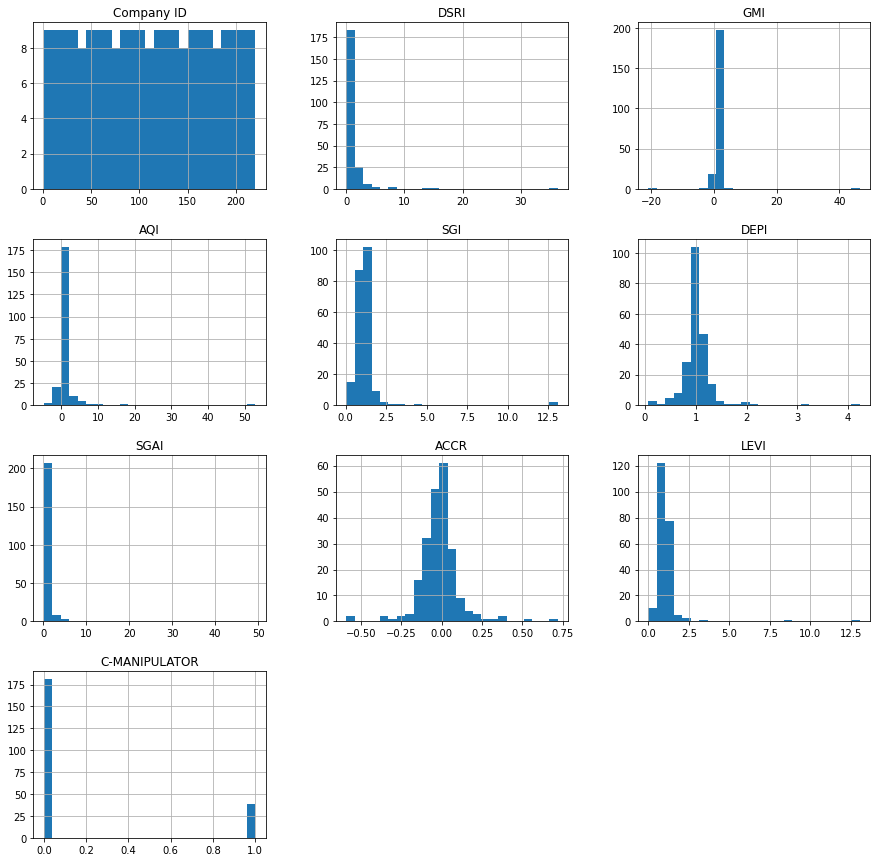

In [9]:
data.hist(bins=25, figsize=(15,15))
plt.show()

## PART III : Data Cleaning

In [10]:
data.isna().any()

Company ID       False
DSRI             False
GMI              False
AQI              False
SGI              False
DEPI             False
SGAI             False
ACCR             False
LEVI             False
Manipulator      False
C-MANIPULATOR    False
dtype: bool

There are no null value. The data is clean

In [11]:
data['Manipulator'].value_counts()

No     181
Yes     39
Name: Manipulator, dtype: int64

In [12]:
cdata['Manipulater'].value_counts()

No     1200
Yes      39
Name: Manipulater, dtype: int64

([<matplotlib.patches.Wedge at 0x7f3851413c90>,
 [Text(-0.9337765969331362, 0.5814303630014274, 'Not Manipulator'),
  Text(0.9337765697144155, -0.5814304067146641, 'Manipulator')],
 [Text(-0.5093326892362561, 0.3171438343644149, '82.27%'),
  Text(0.5093326743896811, -0.3171438582079985, '17.73%')])

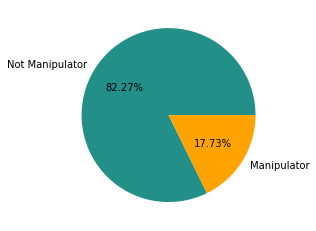

In [13]:
plt.pie(x = data.groupby(['Manipulator']).Manipulator.count(),
        labels = ["Not Manipulator", "Manipulator"], autopct='%1.2f%%',
        colors=['#229088','#ffa300'])

The data seems to be highly imbalanced. 

#### Droping CompanyID and Manipulator as it won't be needed

In [14]:
data=data.drop(['Company ID','Manipulator'], axis=1)

In [15]:
data.head()

,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,C-MANIPULATOR
0,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,1
1,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,1
2,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,1
3,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,1
4,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,1


## PART IV : Spliting data set into training and test dataset

Building model using Sample for Model Development data

In [16]:
X=data.drop(['C-MANIPULATOR'], axis=1)
Y=data['C-MANIPULATOR']

In [17]:
X

,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI
0,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082
1,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732
2,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305
3,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975
4,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047
...,...,...,...,...,...,...,...,...
215,1.002026,0.998118,-0.917605,1.088962,1.030527,1.076770,-0.001079,1.080009
216,0.909365,1.170298,1.971874,1.279013,0.971605,0.985939,-0.035854,1.025102
217,0.937403,0.973292,1.131131,1.083577,1.050011,0.959512,-0.095279,0.976332
218,1.044944,1.021424,4.437887,0.870790,1.026489,1.060493,-0.157146,0.916070


In [18]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.3, random_state=42)

In [19]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions Y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions Y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (154, 8)
Number transactions Y_train dataset:  (154,)
Number transactions X_test dataset:  (66, 8)
Number transactions Y_test dataset:  (66,)


## PART V : Training Model 

#### 1. Linear Regression

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
Y_predict = lin_reg.predict(X_test)
score = lin_reg.score(X_test, Y_test)
linaccuracy = round(score*100,2)
print('accuracy_score percent :', linaccuracy)
msr = np.mean((Y_predict-Y_test)**2)
print("Mean Squared error on Test set : ",msr)

accuracy_score percent : -5.7
Mean Squared error on Test set :  0.14681053287782148


#### 2. Logistic Regression

In [21]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, Y_train)
y_pred = logistic_model.predict(X_test)
score = logistic_model.score(X_test, Y_test)
logaccuracy  = round(score*100,2)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
f2 = fbeta_score(Y_test, y_pred, beta=2.0)
print('Logistic Regression- ')
print('accuracy  : ', logaccuracy)
print('Precision : ',precision)
print('Recall    : ', recall)
print('F1 Score  : ',f1)
print('F2 Score  : ',f2)

Logistic Regression- 
accuracy  :  83.33
Precision :  0.5
Recall    :  0.2727272727272727
F1 Score  :  0.3529411764705882
F2 Score  :  0.3


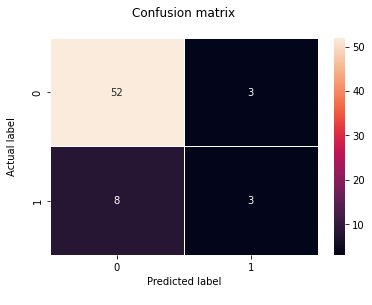

In [22]:
import seaborn as sns
cm = confusion_matrix(Y_test,y_pred)
f,ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm,annot = True, linewidths = 0.5, fmt=".0f", ax=ax)
plt.title('Confusion matrix\n')
plt.xlabel('Predicted label\n')
plt.ylabel('Actual label\n')
plt.show()

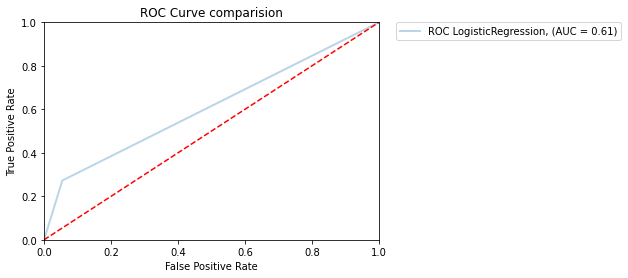

In [23]:
#Receiver operating characterstic curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
predicted = logistic_model.fit(X_train, Y_train).predict(X_test)
fp, tp, th = roc_curve(Y_test, predicted)
plt.plot(fp,tp,lw = 2, alpha = 0.3, label='ROC %s, (AUC = %0.2f)' %(logistic_model.__class__.__name__, auc(fp,tp)))
plt.title('ROC Curve comparision')
plt.legend(bbox_to_anchor =(1.05,1), loc = 2, borderaxespad =0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# PART VI: Improving model accuracy

AdaBoost Classifier- 
accuracy  :  93.94
Precision :  0.8888888888888888
Recall    :  0.7272727272727273
F1 Score  :  0.7999999999999999
F2 Score  :  0.7547169811320755


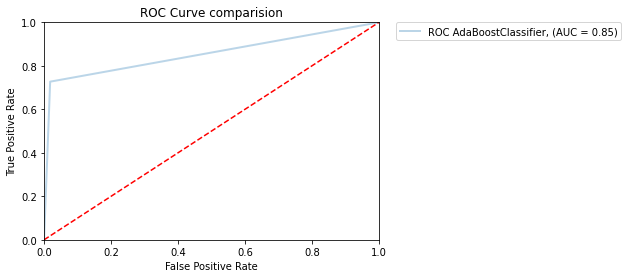

In [24]:
ada = ensemble.AdaBoostClassifier()
pred_ada = ada.fit(X_train,Y_train).predict(X_test)
score = ada.score(X_test, Y_test)
adaaccuracy = round(accuracy_score(Y_test,pred_ada),4)*100
precision = precision_score(Y_test, pred_ada)
recall = recall_score(Y_test, pred_ada)
f1 = f1_score(Y_test, pred_ada)
f2 = fbeta_score(Y_test, pred_ada, beta=2.0)
print('AdaBoost Classifier- ')
print('accuracy  : ', adaaccuracy)
print('Precision : ',precision)
print('Recall    : ', recall)
print('F1 Score  : ',f1)
print('F2 Score  : ',f2)
fp, tp, th = roc_curve(Y_test, pred_ada)
plt.plot(fp,tp,lw = 2, alpha = 0.3, 
         label='ROC %s, (AUC = %0.2f)' %(ada.__class__.__name__, auc(fp,tp)))
plt.title('ROC Curve comparision')
plt.legend(bbox_to_anchor =(1.05,1), loc = 2, borderaxespad =0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
from sklearn.ensemble import VotingClassifier
m1 = LogisticRegression()
m2 = DecisionTreeClassifier(random_state=123)
m3 = RandomForestClassifier()
votingclf = VotingClassifier(estimators=[('lr', m1), ('dt', m2),('rf',m3)], voting='hard')

In [26]:
model_list = [
    ensemble.AdaBoostClassifier(n_estimators= 80),
    ensemble.BaggingClassifier(n_estimators =72, random_state=123),
    ensemble.GradientBoostingClassifier(n_estimators=70, random_state = 123),
    ensemble.RandomForestClassifier(),
    svm.SVC(),
    votingclf,
    KNeighborsClassifier(n_neighbors=3),
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(random_state=0)
]

In [27]:
cols =[]
model_table =pd.DataFrame(columns = cols)

count = 0
for i in model_list:
    pred_model = i.fit(X_train,Y_train).predict(X_test)
    fp,tp,th = roc_curve(Y_test, pred_model)
    cm = confusion_matrix(Y_test,pred_model)
    model_table.loc[count,'Algorithm'] = i.__class__.__name__
    model_table.loc[count,'Train Accuracy'] = round(i.score(X_train, Y_train),2)*100
    model_table.loc[count,'Test Accuracy'] = round(i.score(X_test, Y_test),2)*100
    model_table.loc[count,'Sensitivity'] = round(tp[1],2)
    model_table.loc[count,'Specificity'] = 1-round(fp[1],2)
    model_table.loc[count,'Precision'] = round(precision_score(Y_test, pred_model),2)
    model_table.loc[count,'F1 Score'] = round(f1_score(Y_test, pred_model),2)
    model_table.loc[count,'F2 Score'] = round(fbeta_score(Y_test, pred_model, beta=2.0),2)
    count+=1
model_table.sort_values(by = ['Test Accuracy', 'Precision', 'Sensitivity'], ascending = False, inplace = True)
model_table

,Algorithm,Train Accuracy,Test Accuracy,Sensitivity,Specificity,Precision,F1 Score,F2 Score
0,AdaBoostClassifier,100.0,94.0,0.64,1.00,1.00,0.78,0.69
1,BaggingClassifier,100.0,94.0,0.64,1.00,1.00,0.78,0.69
2,GradientBoostingClassifier,100.0,92.0,0.64,0.98,0.88,0.74,0.67
3,RandomForestClassifier,100.0,91.0,0.45,1.00,1.00,0.62,0.51
5,VotingClassifier,100.0,91.0,0.55,0.98,0.86,0.67,0.59
4,SVC,86.0,89.0,0.36,1.00,1.00,0.53,0.42
6,KNeighborsClassifier,88.0,88.0,0.27,1.00,1.00,0.43,0.32
8,DecisionTreeClassifier,100.0,88.0,0.55,0.95,0.67,0.60,0.57
7,LogisticRegression,87.0,83.0,0.27,0.95,0.50,0.35,0.30


# Part VII : 

<h3> Here <b>Sample for Model Development</b> is used for training the model and <b>Complete Data</b> is used for testing</h3>

In [28]:
X_train = data.drop(['C-MANIPULATOR'], axis=1)
X_train

,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI
0,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082
1,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732
2,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305
3,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975
4,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047
...,...,...,...,...,...,...,...,...
215,1.002026,0.998118,-0.917605,1.088962,1.030527,1.076770,-0.001079,1.080009
216,0.909365,1.170298,1.971874,1.279013,0.971605,0.985939,-0.035854,1.025102
217,0.937403,0.973292,1.131131,1.083577,1.050011,0.959512,-0.095279,0.976332
218,1.044944,1.021424,4.437887,0.870790,1.026489,1.060493,-0.157146,0.916070


In [29]:
Y_train = data['C-MANIPULATOR']
Y_train

0      1
1      1
2      1
3      1
4      1
      ..
215    0
216    0
217    0
218    0
219    0
Name: C-MANIPULATOR, Length: 220, dtype: int64

In [30]:
X_test = cdata.drop(['Company ID','Manipulater','C-MANIPULATOR'], axis=1)
X_test

,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI
0,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082
1,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732
2,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305
3,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975
4,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047
...,...,...,...,...,...,...,...,...
1234,0.893794,1.009273,1.121404,0.775386,1.035547,1.467146,-0.139215,0.947127
1235,1.610841,1.000000,0.672489,3.320315,0.743969,0.968648,-0.028570,2.052802
1236,0.711823,0.938368,1.045118,1.057345,1.274005,0.634451,-0.174759,0.782268
1237,0.870641,1.035855,1.447722,1.202783,1.101233,1.010935,-0.061474,0.906750


In [31]:
Y_test = cdata['C-MANIPULATOR']
Y_test

0       1
1       1
2       1
3       1
4       1
       ..
1234    0
1235    0
1236    0
1237    0
1238    0
Name: C-MANIPULATOR, Length: 1239, dtype: int64

In [32]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions Y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions Y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (220, 8)
Number transactions Y_train dataset:  (220,)
Number transactions X_test dataset:  (1239, 8)
Number transactions Y_test dataset:  (1239,)


In [33]:
cols =[]
model_table =pd.DataFrame(columns = cols)

count = 0
for i in model_list:
    pred_model = i.fit(X_train,Y_train).predict(X_test)
    fp,tp,th = roc_curve(Y_test, pred_model)
    cm = confusion_matrix(Y_test,pred_model)
    model_table.loc[count,'Algorithm'] = i.__class__.__name__
    model_table.loc[count,'Train Accuracy'] = round(i.score(X_train, Y_train),2)*100
    model_table.loc[count,'Test Accuracy'] = round(i.score(X_test, Y_test),2)*100
    model_table.loc[count,'Sensitivity'] = round(tp[1],2)
    model_table.loc[count,'Specificity'] = 1-round(fp[1],2)
    model_table.loc[count,'Precision'] = round(precision_score(Y_test, pred_model),2)
    model_table.loc[count,'F1 Score'] = round(f1_score(Y_test, pred_model),2)
    model_table.loc[count,'F2 Score'] = round(fbeta_score(Y_test, pred_model, beta=2.0),2)
    count+=1
model_table.sort_values(by = ['Test Accuracy', 'Precision', 'Sensitivity'], ascending = False, inplace = True)
model_table

,Algorithm,Train Accuracy,Test Accuracy,Sensitivity,Specificity,Precision,F1 Score,F2 Score
1,BaggingClassifier,100.0,97.0,1.00,0.97,0.55,0.71,0.86
3,RandomForestClassifier,100.0,97.0,1.00,0.97,0.55,0.71,0.86
4,SVC,87.0,97.0,0.28,0.99,0.55,0.37,0.31
0,AdaBoostClassifier,100.0,97.0,1.00,0.97,0.53,0.69,0.85
2,GradientBoostingClassifier,100.0,97.0,1.00,0.97,0.53,0.70,0.85
5,VotingClassifier,100.0,97.0,1.00,0.97,0.53,0.70,0.85
6,KNeighborsClassifier,90.0,96.0,0.46,0.98,0.42,0.44,0.45
7,LogisticRegression,86.0,95.0,0.31,0.97,0.27,0.29,0.30
8,DecisionTreeClassifier,100.0,94.0,1.00,0.93,0.33,0.50,0.71


In [34]:
conda install -c glemaitre imbalanced-learn

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py37h89c1867_2        16.9 MB  conda-forge
    imbalanced-learn-0.9.0     |     pyhd8ed1ab_0         115 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        17.0 MB

The following NEW packages will be INSTALLED:

  imbalanced-

In [35]:
# example of evaluating a decision tree with random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# define pipeline
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.889


# PART VIII : Conclusion

<li>Since the data was highly imbalanced, it is prefferd to use ensemble methods. <br>And after training various model we can see that RandomForest Classifier and Voting classifier are most suitable for Manipulator prediction.
<li>Initially we used Logistic Regression which gave an accuracy of 83.3%. <br>But then after applying variour ensembling techniques we got 94% accuracy for AdaBoostClassifier	and BaggingClassifier.
<li>Later, on testing these classifers on CompleteData we got 98% accuracy <br>for Random Forest and Voting Classifier. <br>And SVC, BaggingClassifier, AdaBoostClassifier and GradientBoostingClassifier <br>are haveing an accuracy of 97% which can also be taken into consideration.